In [6]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0-rc2


In [7]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Data overview
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [9]:
# Scale pixel values to [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

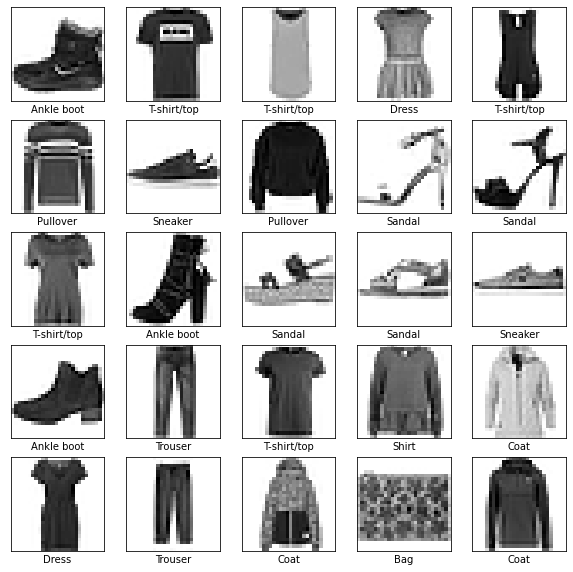

In [10]:
#  Visualizations
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Create model that gives a probability distribution over classes for inputs
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
# Train model
model.fit(train_images, train_labels, epochs=10)

In [13]:
# Save model
model.save('Saved Models')

In [14]:
# Load model
model = tf.keras.models.load_model('Saved Models')

In [15]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.3228 - accuracy: 0.8879

Test accuracy: 0.8878999948501587


In [16]:
# Make predictions
predictions = probability_model.predict(test_images)
print("Probability distribution:\n" + str(predictions[0]))
print("Best guess index:\n" + str(np.argmax(predictions[0])))

Probability distribution:
[0.14373784 0.06913432 0.08527981 0.11971845 0.05160349 0.08450776
 0.10546259 0.15431039 0.06845462 0.11779068]
Best guess index:
7


In [17]:
# Plot all predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

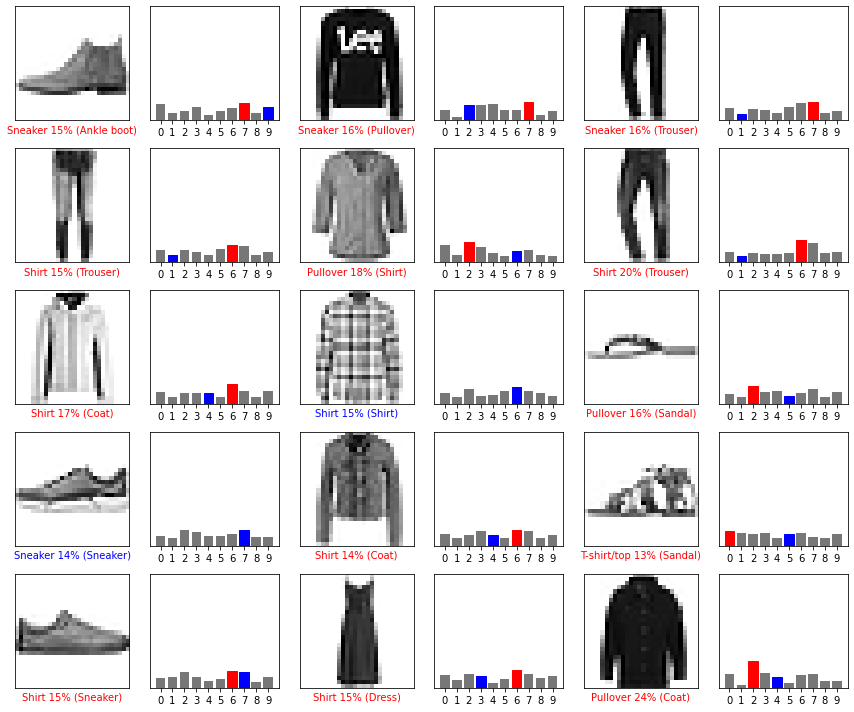

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

[[0.08880626 0.02948775 0.1325483  0.13459307 0.143347   0.08768398
  0.09431426 0.15896714 0.05089541 0.07935688]]


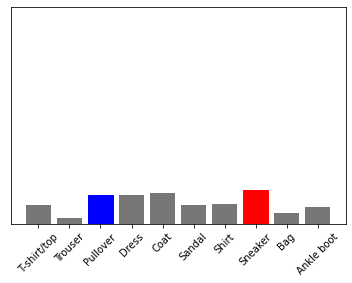

7

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

# Now predict the correct label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

# Plot the true class blue and the predicted class red
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

# The predicted class index
np.argmax(predictions_single[0])